In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('IMDB_Dataset.csv')

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.duplicated().sum()

418

In [7]:
df.drop_duplicates()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [8]:
df = df.drop_duplicates()

In [9]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# Step1: The Cleaning -  for the data cleaning the usual steps are
- ### lowercasing
- ### remove leading and trailing spaces
- ### remove html tag
- ### rmove urls
- ### expanding abbreviation
- ### spelling correction
- ### punctuations
- ### remove special characters



### 1: convert all the text to lower case

In [10]:
df['review'] = df['review'].str.lower()

/var/folders/h1/njy9595n2lj4xjmnz1st5v4h0000gn/T/ipykernel_2131/724319867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].str.lower()


## to get rid of this warning we can try this syntax

In [11]:
df.loc[:,'review'] = df['review'].str.lower()

## or we can use copy() at the begining of the code

In [12]:
df = df.copy()

## Step2: remove white spaces

In [13]:
df['review'] = df['review'].str.strip()

In [14]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


## Step3: remove html tag

In [15]:
import re

def remove_html(data):
    data=re.sub(r'<.*?>','',data)
    return data

In [16]:
remove_html(' little production. <br /><br />the')

' little production. the'

### instead of writing the function above we can also use replace() to get the job done

In [17]:
df['review'].str.replace(r'<.*?>','',regex=True)

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

In [18]:
df['review'] = df['review'].str.replace(r'<.*?>','',regex=True)

## Remove any url in the reviews

In [19]:
# http://campusx.in www.campusx.in www.campusx.co.in

def remove_url(data):
    data=re.sub(r"https?://\S+|www\.\S+",'',data)
    return data

## Using replace() to remove the urls

In [20]:
df['review'].str.replace(r"https?://\S+|www\.\S+",'',regex=True)

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

## If we wanna find out the reviews where are url presents, we can use contains() instead replace()

In [21]:
df[df['review'].str.contains(r"https?://\S+|www\.\S+")].iloc[0][0]

/var/folders/h1/njy9595n2lj4xjmnz1st5v4h0000gn/T/ipykernel_2131/3433221130.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[df['review'].str.contains(r"https?://\S+|www\.\S+")].iloc[0][0]


'mario lewis of the competitive enterprise institute has written a definitive 120-page point-by-point, line-by-line refutation of this mendacious film, which should be titled a convenient lie. the website address where his debunking report, which is titled "a skeptic\'s guide to an inconvenient truth" can be found at is :www.cei.org. a shorter 10-page version can be found at: www.cei.org/pdf/5539.pdf once you read those demolitions, you\'ll realize that alleged "global warming" is no more real or dangerous than the y2k scare of 1999, which gore also endorsed, as he did the pseudo-scientific film the day after tomorrow, which was based on a book written by alleged ufo abductee whitley strieber. as james "the amazing" randi does to psychics, and philip klass does to ufos, and gerald posner does to jfk conspir-idiocy theories, so does mario lewis does to al gore\'s movie and the whole "global warming" scam.'

## url removed and making it permanent change

In [22]:
df['review'] = df['review'].str.replace(r"https?://\S+|www\.\S+",'',regex=True)

## expanding abbreviation

The function usually get the job done. This is typical function contain all the possible abbreviation

In [23]:
import re

def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data

In [24]:
remove_abb("i can't help")

'i cannot help'

In [25]:
df['review'].apply(remove_abb)

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there is a family where a little boy...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    I am going to have to disagree with the previo...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

In [26]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


## spelling correction - to check spelling we'll use a library called textblob

In [119]:
from textblob import TextBlob

In [120]:
text = 'Helo there I lve drving'
TextBlob(text).correct().string # not 100% accurate but get the job done

'Felo there I love driving'

In [121]:
def spelling_correction(text):
    return TextBlob(text).correct().string

## df['review'].apply(spelling_correction) or applying on the whole datafram takes a huze time to complete I waited about 20 minutes still didn't finish

In [30]:
#df = df.iloc[:50]

In [122]:
df = df.copy() # to get rid of the warning

In [32]:
df['review'] = df['review'].apply(spelling_correction)  # this would take a huze time to execute

## remove punctuations

In [27]:
import string

In [28]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
def remove_punctuation(text):
    for i in string.punctuation:
        if i in text:
            text = text.replace(i,'')
    return text

In [30]:
df['review'] = df['review'].apply(remove_punctuation)

## Remove special characters

In [37]:
# replace character 
#str.replace('[^\w\s]','')
# remove punctuation would have already took care of it 

# Step2: Data preprocessing - the steps are
- ## tokenization(keep string)
- ## removing stopwords

### tokenization: seperate every word

In [31]:
import nltk
from nltk.tokenize import word_tokenize

In [32]:
# Download the 'punkt' tokenizer data
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sourabhsamanta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:

# Sample DataFrame
data1 = {'review': ['This is the first review.', 'Here is another review.']}
sample_df = pd.DataFrame(data1)

# Apply the word_tokenize function
sample_df['tokenized_review'] = sample_df['review'].apply(word_tokenize)

print(sample_df)


                      review                   tokenized_review
0  This is the first review.  [This, is, the, first, review, .]
1    Here is another review.     [Here, is, another, review, .]


In [34]:
df['review'].apply(word_tokenize)

0        [one, of, the, other, reviewers, has, mentione...
1        [a, wonderful, little, production, the, filmin...
2        [i, thought, this, was, a, wonderful, way, to,...
3        [basically, theres, a, family, where, a, littl...
4        [petter, matteis, love, in, the, time, of, mon...
                               ...                        
49995    [i, thought, this, movie, did, a, down, right,...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [i, am, a, catholic, taught, in, parochial, el...
49998    [im, going, to, have, to, disagree, with, the,...
49999    [no, one, expects, the, star, trek, movies, to...
Name: review, Length: 49582, dtype: object

In [35]:
df['tokenized_review'] = df['review'].apply(word_tokenize)

In [36]:
df.head()

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically theres a family where a little boy j...,negative,"[basically, theres, a, family, where, a, littl..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."


## stop word removal

In [131]:
from nltk.corpus import stopwords

In [132]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sourabhsamanta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [133]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [134]:
# time complexity of this code n^3 it's gonna take a huze time for a large dataset look for alternatives
def stopword_remover(text):
    l = []
    for word in text:
        if word not in stopwords.words('english'):
            l.append(word)
    return l 

In [ ]:
df['tokenized_review'].apply(stopword_remover)  # this will take a huze time

## To improve the time complexity of removing stop words from a column in a pandas DataFrame, you can use more efficient methods such as vectorization and avoiding repeated calls to the stopwords.words('english') method. Here’s a more optimized approach using vectorization with pandas:

### Pre-compute the set of stop words: This avoids calling the stopwords.words('english') method repeatedly.

### Use pandas' vectorized string operations: This can help in speeding up the text processing. Here is the optimized code:

In [37]:
import pandas as pd
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

# Precompute the set of stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords_optimized(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Example DataFrame
data2 = {'review': ['This is a sample review', 'Another review with stop words']}
sample_df2 = pd.DataFrame(data2)

# Apply the function to the 'review' column using pandas' vectorized operations
sample_df2['review'] = sample_df2['review'].str.split().apply(lambda x: ' '.join([word for word in x if word.lower() not in stop_words]))

print(sample_df2)

                      review
0              sample review
1  Another review stop words


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sourabhsamanta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## reassigning to review column after removing the sto words

In [137]:
df['tokenized_review'].apply(lambda x: ' '.join(x))

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: tokenized_review, Length: 49582, dtype: object

In [38]:
df['review'] = df['tokenized_review'].apply(lambda x: ' '.join(x))

In [39]:
df.head()

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically theres a family where a little boy j...,negative,"[basically, theres, a, family, where, a, littl..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."


# Step3: EDA and Feature Engineering
- ## distribution of text length/word count
- ## common unigrams/bigrams/trigrams
- ## wordcloud

## find character length

In [40]:
df['review'].str.len()

0        1665
1         936
2         874
3         685
4        1237
         ... 
49995     950
49996     605
49997    1222
49998    1206
49999     645
Name: review, Length: 49582, dtype: int64

## adding it to the main dataframe/creating a new feature 

In [41]:
df['char_length'] = df['review'].str.len()

In [42]:
df.head()

,review,sentiment,tokenized_review,char_length
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione...",1665
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin...",936
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,...",874
3,basically theres a family where a little boy j...,negative,"[basically, theres, a, family, where, a, littl...",685
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon...",1237


## count word length

In [43]:
df['tokenized_review'].apply(len)

0        301
1        156
2        162
3        129
4        222
        ... 
49995    190
49996    109
49997    225
49998    212
49999    124
Name: tokenized_review, Length: 49582, dtype: int64

In [44]:
df['word_length'] = df['review'].apply(len)

In [45]:
df.head()

,review,sentiment,tokenized_review,char_length,word_length
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione...",1665,1665
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin...",936,936
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,...",874,874
3,basically theres a family where a little boy j...,negative,"[basically, theres, a, family, where, a, littl...",685,685
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon...",1237,1237


## Now that we have created two new features character length and word length, let's find out if these features is gonna help us in our analysis, one way to do that plot a distribution plot on these two features

In [46]:
import seaborn as sns

/var/folders/h1/njy9595n2lj4xjmnz1st5v4h0000gn/T/ipykernel_2131/4093798214.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['char_length'])


<Axes: xlabel='char_length', ylabel='Density'>

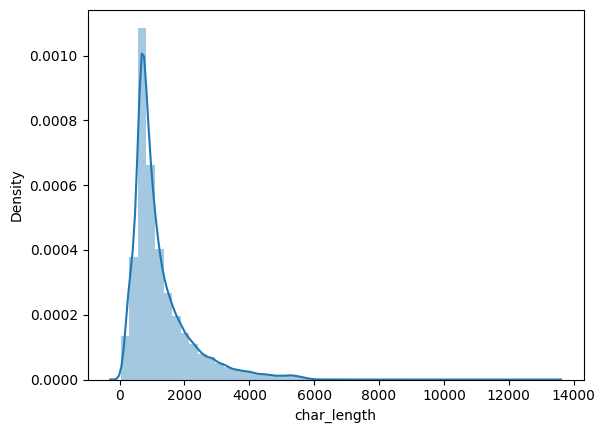

In [47]:
sns.distplot(df['char_length'])

## plot the same thing on the positive setiment and negative sentiment; if these two plots have a significant deference than this charater length feature is helpful otherwise not. For the whole dataset both plots look same(unlike here) so char_length is not a helpful feature

/var/folders/h1/njy9595n2lj4xjmnz1st5v4h0000gn/T/ipykernel_2131/669209998.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment'] == 'positive']['char_length'])
/var/folders/h1/njy9595n2lj4xjmnz1st5v4h0000gn/T/ipykernel_2131/669209998.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

<Axes: xlabel='char_length', ylabel='Density'>

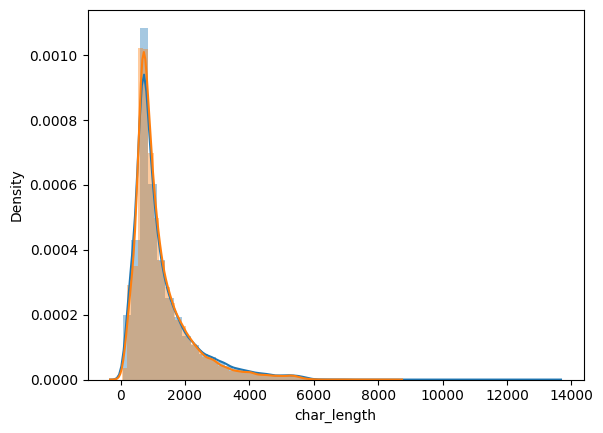

In [48]:
sns.distplot(df[df['sentiment'] == 'positive']['char_length'])
sns.distplot(df[df['sentiment'] == 'negative']['char_length'])

## Let's try the same thing for word_length; for the whole dataset both the plots look same so it didn't help either

/var/folders/h1/njy9595n2lj4xjmnz1st5v4h0000gn/T/ipykernel_2131/3480675452.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment'] == 'positive']['word_length'])
/var/folders/h1/njy9595n2lj4xjmnz1st5v4h0000gn/T/ipykernel_2131/3480675452.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

<Axes: xlabel='word_length', ylabel='Density'>

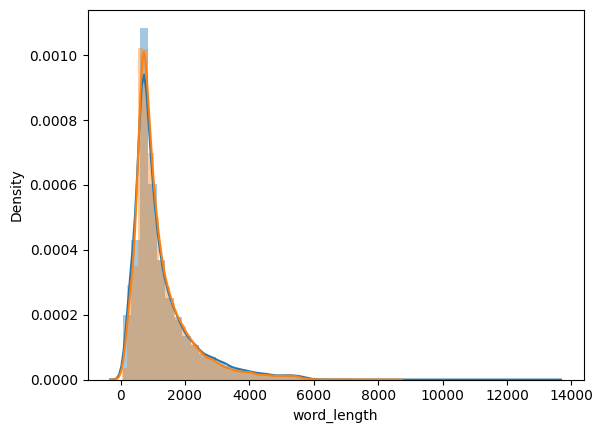

In [49]:
sns.distplot(df[df['sentiment'] == 'positive']['word_length'])
sns.distplot(df[df['sentiment'] == 'negative']['word_length'])

## So we have to try different approachs to find out what are the fearures that are distinguishable for detecting a positive and negative review, for example like we can find the number of appearence of a word like 'not' etc

## watch this bhai ka playlist: https://www.youtube.com/playlist?list=PLKnIA16_RmvZo7fp5kkIth6nRTeQQsjfX

## especially the last video

# unigrams/bigrams/trigrams

## to find out the number of combination of words in 2 or 3

| Unigrams, bigrams, and trigrams are terms used in natural language processing (NLP) to refer to sequences of tokens or words in text data. These terms are types of n-grams, where "n" represents the number of words in each sequence. Here's a detailed explanation of each: |   |   |   |   |
|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|---|---|
| Unigrams:                                                                                                                                                                                                                                                                      |   |   |   |   |
| Definition: A unigram is a single word or token. It is the simplest form of n-grams, with n=1.                                                                                                                                                                                 |   |   |   |   |
| Example: For the sentence "The cat sat on the mat", the unigrams are: ['The', 'cat', 'sat', 'on', 'the', 'mat'].                                                                                                                                                               |   |   |   |   |
| Bigrams:                                                                                                                                                                                                                                                                       |   |   |   |   |
| Definition: A bigram is a sequence of two consecutive words or tokens. It is a form of n-gram with n=2.                                                                                                                                                                        |   |   |   |   |
| Example: For the sentence "The cat sat on the mat", the bigrams are: ['The cat', 'cat sat', 'sat on', 'on the', 'the mat'].                                                                                                                                                    |   |   |   |   |
| Trigrams:                                                                                                                                                                                                                                                                      |   |   |   |   |
| Definition: A trigram is a sequence of three consecutive words or tokens. It is a form of n-gram with n=3.                                                                                                                                                                     |   |   |   |   |
| Example: For the sentence "The cat sat on the mat", the trigrams are: ['The cat sat', 'cat sat on', 'sat on the', 'on the mat'].                                                                                                                                               |   |   |   |   |
| Usage in NLP:                                                                                                                                                                                                                                                                  |   |   |   |   |
| Feature Extraction: Unigrams, bigrams, and trigrams can be used as features in various NLP tasks such as text classification, sentiment analysis, and language modeling.                                                                                                       |   |   |   |   |
| Context Capture: While unigrams capture individual words, bigrams and trigrams help capture context and the relationship between words, improving the performance of NLP models.                                                                                               |   |   |   |   |
| Example Code to Generate N-grams Using Python:                                                                                                                                                                                                                                 |   |   |   |   |
| Here's how you can generate unigrams, bigrams, and trigrams using Python and the nltk library:                                                                                                                                                                                 |   |   |   |   |

In [50]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams

# Example sentence
sentence = "The cat sat on the mat"

# Tokenize the sentence
tokens = word_tokenize(sentence)

# Generate unigrams, bigrams, and trigrams
unigrams = list(ngrams(tokens, 1))
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

print("Unigrams:", unigrams)
print("Bigrams:", bigrams)
print("Trigrams:", trigrams)

Unigrams: [('The',), ('cat',), ('sat',), ('on',), ('the',), ('mat',)]
Bigrams: [('The', 'cat'), ('cat', 'sat'), ('sat', 'on'), ('on', 'the'), ('the', 'mat')]
Trigrams: [('The', 'cat', 'sat'), ('cat', 'sat', 'on'), ('sat', 'on', 'the'), ('on', 'the', 'mat')]


In [51]:
from nltk import ngrams

In [ ]:
len(df['tokenized_review'].sum())

10670

In [ ]:
#df = df.iloc[:5000]

In [ ]:
pd.Series(ngrams(df['tokenized_review'].sum(),2)).value_counts()

(of, the)             84
(in, the)             50
(the, movie)          32
(to, the)             30
(and, the)            28
                      ..
(you, heard)           1
(after, you)           1
(but, after)           1
(you, but)             1
(limping, tillers)     1
Name: count, Length: 8560, dtype: int64

In [ ]:
pd.Series(ngrams(df['tokenized_review'].sum(),3)).value_counts()

(one, of, the)                 14
(in, the, movie)                8
(of, the, film)                 7
(is, one, of)                   6
(of, the, most)                 5
                               ..
(sex, in, those)                1
(in, those, weird)              1
(those, weird, horrible)        1
(weird, horrible, costumes)     1
(10, limping, tillers)          1
Name: count, Length: 10380, dtype: int64

# Wordcloud

A word cloud, also known as a tag cloud, is a visual representation of text data where the size of each word indicates its frequency or importance within the text. Words that appear more frequently in the source text are shown in larger, bolder fonts, while less frequent words are displayed in smaller fonts. Word clouds are commonly used to quickly visualize the most prominent terms in a dataset, such as a body of text or a collection of documents.

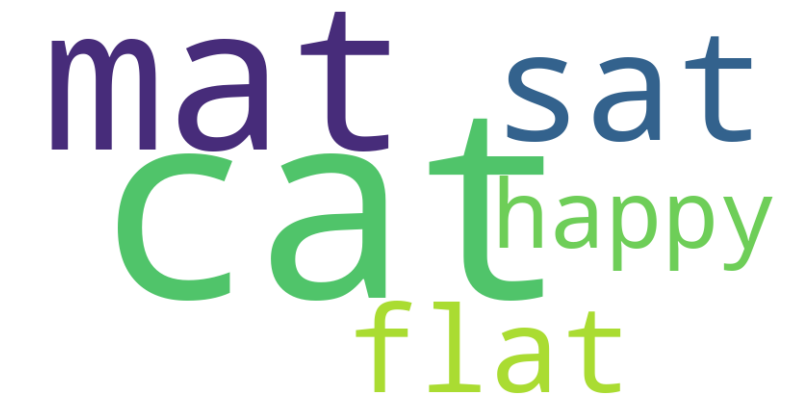

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text
text = "The cat sat on the mat. The mat was flat. The cat was very happy."

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Let's generate the wordcloud for positive sentiment

In [ ]:
df.head()

,review,sentiment,tokenized_review,char_length,word_length
0,one of the other reviews has mentioned that af...,positive,"[one, of, the, other, reviews, has, mentioned,...",1658,1658
1,a wonderful little production the filling tech...,positive,"[a, wonderful, little, production, the, fillin...",929,929
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,...",868,868
3,basically theres a family where a little boy j...,negative,"[basically, theres, a, family, where, a, littl...",688,688
4,letter matters love in the time of money is a ...,positive,"[letter, matters, love, in, the, time, of, mon...",1229,1229


In [ ]:
' '.join(df[df['sentiment'] == 'positive']['review'])

'one of the other reviews has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutally and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punched with regards to drugs sex or violence its is hardware in the classic use of the wordit is called oz as that is the nickname given to the onward maximum security state penitentiary it focused mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyorgans muslin gangstas nations christians italians irish and moreso snuffles death stares podgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictures 

one of the other reviews has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutally and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punched with regards to drugs sex or violence its is hardware in the classic use of the wordit is called oz as that is the nickname given to the onward maximum security state penitentiary it focused mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyorgans muslin gangstas nations christians italians irish and moreso snuffles death stares podgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictures p

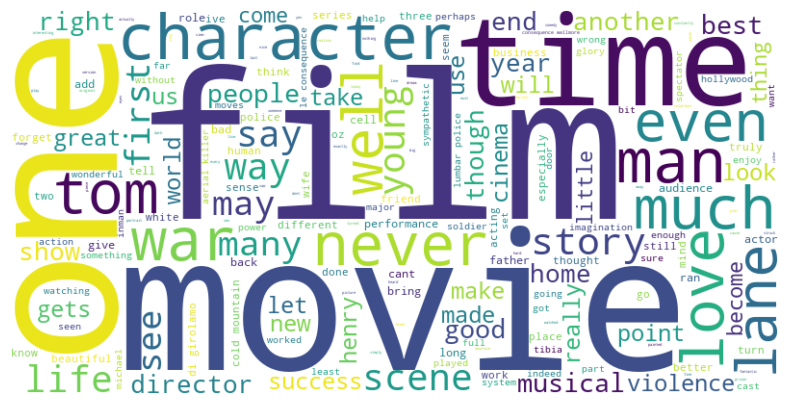

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df[df['sentiment'] == 'positive']['review'])
print(text)

# Create a word cloud object
wc = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Let's generate the wordcloud for negative sentiment

basically theres a family where a little boy jake thinks theres a combine in his closet his parents are fighting all the timethis movie is slower than a soap opera and suddenly jake decides to become ratio and kill the combineok first of all when youre going to make a film you must decide if its a thrilled or a drama as a drama the movie is watchable parents are diverting arguing like in real life and then we have jake with his closet which totally ruins all the film i expected to see a boogeyman similar movie and instead i watched a drama with some meaningless thrilled spots3 out of 10 just for the well playing parents descent dialogue as for the shots with jake just ignore them this show was an amazing fresh innovative idea in the 70s when it first tired the first 7 or 8 years were brilliant but things dropped off after that by 1990 the show was not really funny anymore and its continued its decline further to the complete waste of time it is todayits truly disgraceful how far this s

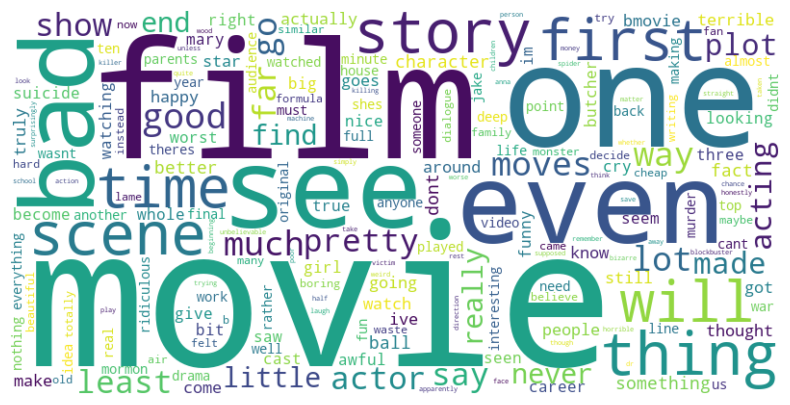

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df[df['sentiment'] == 'negative']['review'])
print(text)

# Create a word cloud object
wc = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Vecterization: 

Vectorization in the context of natural language processing (NLP) refers to the process of converting text data into numerical vectors that can be used as input to machine learning algorithms. Since machine learning models cannot directly process raw text, vectorization is a crucial step in the text preprocessing pipeline.

## Bag of words:

The Bag of Words model is a simple and widely used vectorization technique in NLP. It represents text data in a way that disregards grammar and word order but keeps track of the number of occurrences of each word.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
documents = [
    "The cat sat on the mat.",
    "The dog lay on the rug."
]

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the model and transform the documents into vectors
X = vectorizer.fit_transform(documents)

# Get feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Convert the vectors to an array
vector_array = X.toarray()

print("Vocabulary:", feature_names)
print("Vectors:\n", vector_array)

Vocabulary: ['cat' 'dog' 'lay' 'mat' 'on' 'rug' 'sat' 'the']
Vectors:
 [[1 0 0 1 1 0 1 2]
 [0 1 1 0 1 1 0 2]]


## for unigram vector representation 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000,ngram_range=(1,1))
bag_of_words = count_vectorizer.fit_transform(df['review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names_out())

In [ ]:
bag_of_words

,0510,10,100,10000,12,15,17,1947,1963,1990,...,yet,york,you,youll,young,younger,youngs,your,youre,zellweger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,1,0,0,0,0,0


## for bigram vector representation 

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000,ngram_range=(2,2))
bag_of_words = count_vectorizer.fit_transform(df['review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names_out())
bag_of_words

,0510 was,about and,about his,about the,about this,acting is,action sequence,action to,actors are,actors the,...,your darker,your eyes,your face,your loss,your money,your time,your usual,your way,youre going,youre looking
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## for trigram vector representation 

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000,ngram_range=(3,3))
bag_of_words = count_vectorizer.fit_transform(df['review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names_out())
bag_of_words

,0510 was originally,about this film,aerial killer but,all about and,all of the,and no substance,and of itself,and the glory,and to have,and what was,...,your bored of,your darker side,your eyes the,your face throughout,your loss world,your time and,your usual bmovie,your way to,youre going to,youre looking for
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Additional
- ## PCA
- ## Stemming
- ## POS tagging


### right now the data is in higher dimention we conduct pca to convert higher dimention data to lower dimention right now the data is in 5000 dimention

In [86]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # 2 for 2 dimention, x for x dimention
pca_result = pca.fit_transform(bag_of_words.values)

In [87]:
pca_result

array([[-0.42665754, -0.3394185 ],
       [-0.29759344, -0.38793417],
       [-0.26872545, -0.43081608],
       [-0.24797191, -0.39748367],
       [-0.3349242 , -0.5125657 ],
       [-0.24406217, -0.3921713 ],
       [-0.20276713, -0.41422298],
       [-0.27589328, -0.43466249],
       [-0.27065232, -0.35304838],
       [-0.21658001, -0.34578665],
       [-0.23477138, -0.37548682],
       [-0.28615202, -0.46187047],
       [-0.53564998, -0.54872792],
       [-0.24463085, -0.39215886],
       [-0.25069117, -0.32540742],
       [-0.24316588, -0.31460599],
       [-0.24212305, -0.48716442],
       [-0.23489706, -0.50014938],
       [-0.27752494, -0.36249174],
       [-0.30718133, -0.2789191 ],
       [-0.32922574, -0.5527464 ],
       [-0.15701635, -0.35988041],
       [-0.22506574, -0.36009992],
       [-0.47002294, -0.64662256],
       [-0.29077552, -0.44642664],
       [-0.23941928, -0.38375131],
       [-0.85507812, -1.74285795],
       [-0.26538902, -0.34332093],
       [-0.24684567,

In [88]:
pca_result.shape

(50, 2)

### this lower dimentiality to visualize the data

<Axes: >

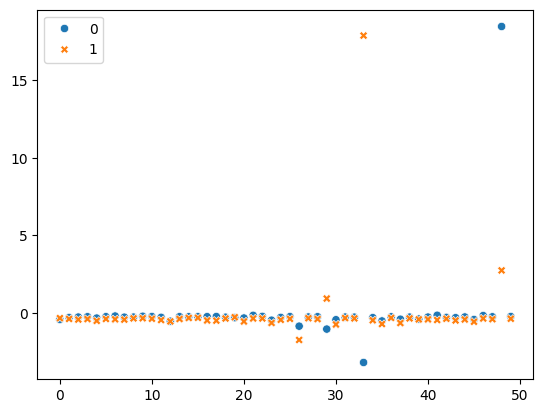

In [89]:
sns.scatterplot(pca_result)

<Axes: >

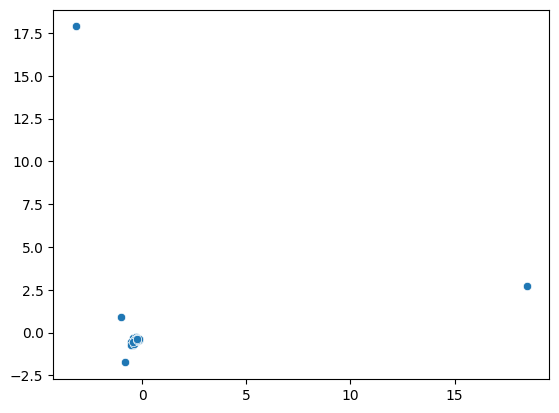

In [91]:
sns.scatterplot(x=pca_result[:,0],y=pca_result[:,1])

<Axes: >

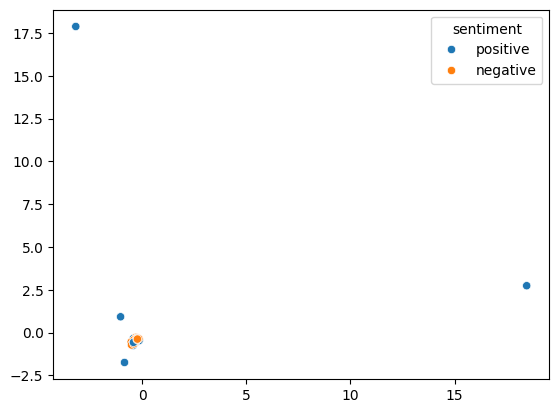

In [92]:
sns.scatterplot(x=pca_result[:,0],y=pca_result[:,1],hue=df['sentiment'])